# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     631.4
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           2.28e-37
Time:                        20:01:39   Log-Likelihood:                -9.3745
No. Observations:                  50   AIC:                             26.75
Df Residuals:                      46   BIC:                             34.40
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8729      0.104     46.983      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.33036736  4.84554773  5.31762903  5.71663628  6.02341231  6.23276522
  6.35432143  6.41094406  6.43497659  6.46292894  6.52947896  6.66177496
  6.87497536  7.16975815  7.53220953  7.93610992  8.34724172  8.7290112
  9.04846073  9.28168365  9.41775202  9.4605121   9.42795239  9.34924817
  9.2599681   9.19623038  9.18876864  9.25788247  9.41010229  9.63711639
  9.91713652 10.21847767 10.5047638  10.74090431 10.89885938 10.96224674
 10.92903335 10.81186932 10.63600957 10.43516454 10.24596164 10.10192745
 10.02797944 10.03633206 10.12448998 10.27565803 10.46150061 10.64679716
 10.79522881 10.8753454 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.85010658 10.67978224 10.38594163 10.01773839  9.639876    9.31676609
  9.09675827  9.00030243  9.0149419   9.09836328]


## Plot comparison

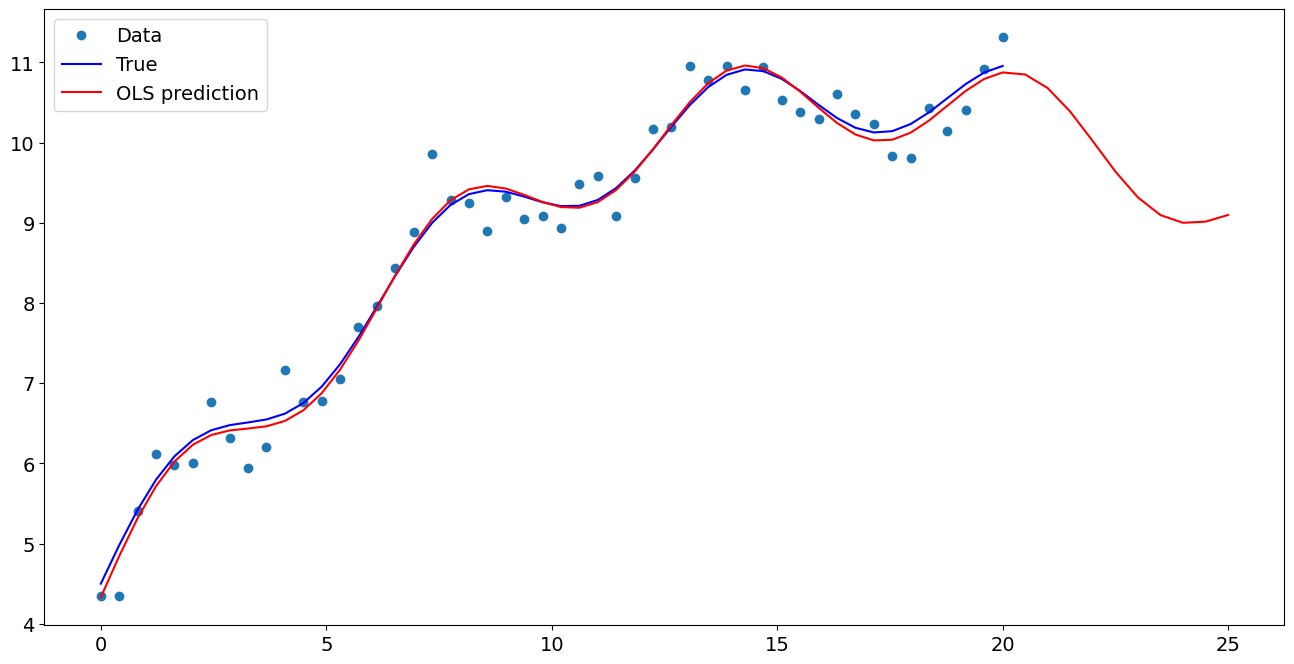

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.872922
x1                  0.519164
np.sin(x1)          0.550009
I((x1 - 5) ** 2)   -0.021702
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.850107
1    10.679782
2    10.385942
3    10.017738
4     9.639876
5     9.316766
6     9.096758
7     9.000302
8     9.014942
9     9.098363
dtype: float64